# Extract gene annotation data from a metadata file

Made by: Cynthia Soto <br>
Date: Feb 24, 2021 <br>
Last md:  <br>

**Assumptions:**<br>
1. The annotation file(s) must to exist.
2. Takes a custom & given file (g.e. a cluster with gene IDs), parse it and match the gene' IDs with a metadata (annotation) file provided to retrieve annotation data. It is used to track gene(s) of interest.
**Input:** 
1. Any file with gene IDs as keys and annotation data. g.e: 
    1. *athal_GO_terms.txt
    2. Araport11_GFF3_genes_transposons.201606.gff
    3. Araport11_functional_descriptions_20181231.txt*
2. The file to be parsed: g.e:
    1. *<name_gene_cluster>.csv*

**Code goal:** <br>
1. A file with gene's IDs is parsed and match with a metadata file to retrieve names, functions, isoforms, etc.

In [14]:
# Libraries required
import os 
import glob
import pandas as pd

In [15]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    


Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/meta-data


In [16]:
file="../results-data/infected_exclusive_repressed_genes.csv"   #all_infected_Log2_17ceros_Q3_drop.csv
df_gene_names = pd.read_csv(file, sep='\t', usecols=[0]) 

In [17]:
print(df_gene_names.shape)
df_gene_names.head()

(242, 1)


,AT1G74675
0,AT2G11778
1,AT5G41660
2,AT2G34320
3,AT3G23470
4,AT2G04037


### GO TERMS file

In [18]:
file = "athal_GO_terms.txt"
df = pd.read_csv(file, sep='\t')    ## , usecols=[1,3], nrows=100, 

In [19]:
print(df.shape)
df.head(3)

(201479, 12)


,Locus,TAIR internal locus id,Gene Model(s),GO term,GO ID,TAIR internal GO id,category,GO Slim(s),Evidence code,Reference,Made by,date last modified
0,AT1G01010,2200934.0,AT1G01010.1,nucleus,GO:0005634,537.0,comp,nucleus,ISM,AnalysisReference:501780126,NaN,08/31/2018 00:00:00
1,AT1G01010,2200935.0,AT1G01010,"regulation of transcription, DNA-templated",GO:0006355,7461.0,proc,other cellular processes | nucleobase-containi...,ISS,Publication:1345963|PMID:11118137,NaN,04/02/2018 00:00:00
2,AT1G01010,2200935.0,AT1G01010,DNA-binding transcription factor activity,GO:0003700,4449.0,func,DNA-binding transcription factor activity,ISS,Publication:1345963|PMID:11118137,TAIR,06/06/2003 00:00:00


In [20]:
df = df[["Locus","GO term","category","Evidence code"]]

In [21]:
df = df[df['category'] == "func"]
df.head()

,Locus,GO term,category,Evidence code
2,AT1G01010,DNA-binding transcription factor activity,func,ISS
6,AT1G01020,molecular_function_unknown,func,ND
22,AT1G01030,protein binding,func,IPI
27,AT1G01030,DNA-binding transcription factor activity,func,ISS
32,AT1G01040,protein binding,func,IPI


In [22]:
print(df.shape)
## count duplicates under a specific column
df.pivot_table(index=['Locus'], aggfunc='size').hist()

(53878, 4)


Locus
AT1G01010     1
AT1G01020     1
AT1G01030     2
AT1G01040    11
AT1G01050     6
             ..
ATMG01350     1
ATMG01360     3
ATMG01370     1
ATMG01400     1
ATMG01410     1
Length: 22340, dtype: int64

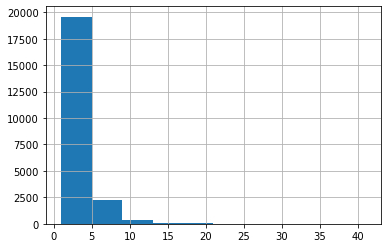

In [32]:
df.pivot_table(index=['Locus'], aggfunc='size').hist()

In [33]:
df.pivot_table(index=['Locus'], aggfunc='size').max()

41

In [35]:
df.pivot_table(index=['Locus'], aggfunc='size').sort_values().tail(10)

Locus
AT4G39400    28
AT1G09570    28
AT3G48750    29
AT4G26080    30
AT2G01570    31
AT2G18790    33
AT1G75950    36
AT3G01090    38
AT4G33430    39
AT2G32950    41
dtype: int64

In [37]:
df_grater1 = df.pivot_table(index=['Locus'], aggfunc='size')

In [43]:
df_grater1 = df_grater1[df_grater1 > 1]

In [44]:
df_grater1

Locus
AT1G01030     2
AT1G01040    11
AT1G01050     6
AT1G01060     5
AT1G01080     3
             ..
ATMG01190     7
ATMG01270     2
ATMG01280     2
ATMG01320     2
ATMG01360     3
Length: 11128, dtype: int64

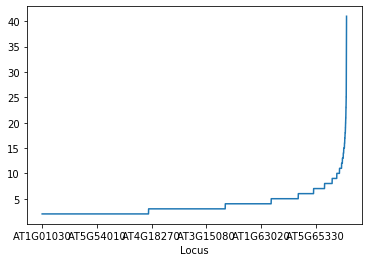

In [48]:
df_grater1.sort_values().plot()

### GFF (General Feature Format) 
Format consists of one line per feature, each containing 9 columns of data, plus optional track definition lines. 
- [From **#Araport11_GFF3_genes_transposons.201606.gff** we can use:](#heading)
  * 1. name, gene_model_type, short_description, Curator_summary and Computational_description

In [23]:
file = "Araport11_GFF3.gff"
### reading an "incorrect" CSV to dataframe having a variable number of columns/tokens 
header_list = ["Chr", "Ann", "Feature","st","end","aa","ord","bb","ID"]
pd_gff = pd.read_csv(file, header=0, sep='\t', names=header_list)   #, nrows=500

In [24]:
pd_gff.head()

,Chr,Ann,Feature,st,end,aa,ord,bb,ID
0,Chr1,Araport11,five_prime_UTR,3631.0,3759.0,.,+,.,ID=AT1G01010:five_prime_UTR:1;Parent=AT1G01010...
1,Chr1,Araport11,exon,3631.0,3913.0,.,+,.,ID=AT1G01010:exon:1;Parent=AT1G01010.1;Name=NA...
2,Chr1,Araport11,CDS,3760.0,3913.0,.,+,0,ID=AT1G01010:CDS:1;Parent=AT1G01010.1;Name=NAC...
3,Chr1,Araport11,exon,3996.0,4276.0,.,+,.,ID=AT1G01010:exon:2;Parent=AT1G01010.1;Name=NA...
4,Chr1,Araport11,CDS,3996.0,4276.0,.,+,2,ID=AT1G01010:CDS:2;Parent=AT1G01010.1;Name=NAC...


In [25]:
print(pd_gff.shape)

(908168, 9)


In [26]:
pd_gff.columns

Index(['Chr', 'Ann', 'Feature', 'st', 'end', 'aa', 'ord', 'bb', 'ID'], dtype='object')

In [27]:
pd_gff.Feature.unique()

array(['five_prime_UTR', 'exon', 'CDS', 'three_prime_UTR', nan, 'protein',
       'gene', 'mRNA', 'lnc_RNA', 'transposable_element',
       'transposon_fragment', 'antisense_lncRNA',
       'miRNA_primary_transcript', 'miRNA', 'transcript_region', 'tRNA',
       'antisense_RNA', 'pseudogene', 'pseudogenic_transcript',
       'pseudogenic_exon', 'transposable_element_gene', 'snoRNA', 'ncRNA',
       'snRNA', 'uORF', 'pseudogenic_tRNA', 'rRNA'], dtype=object)

In [28]:
pd_gff = pd_gff[pd_gff['Feature'] == "CDS"]

In [29]:
pd_gff.shape

(286355, 9)

In [30]:
pd_gff.head()

,Chr,Ann,Feature,st,end,aa,ord,bb,ID
2,Chr1,Araport11,CDS,3760.0,3913.0,.,+,0,ID=AT1G01010:CDS:1;Parent=AT1G01010.1;Name=NAC...
4,Chr1,Araport11,CDS,3996.0,4276.0,.,+,2,ID=AT1G01010:CDS:2;Parent=AT1G01010.1;Name=NAC...
6,Chr1,Araport11,CDS,4486.0,4605.0,.,+,0,ID=AT1G01010:CDS:3;Parent=AT1G01010.1;Name=NAC...
8,Chr1,Araport11,CDS,4706.0,5095.0,.,+,0,ID=AT1G01010:CDS:4;Parent=AT1G01010.1;Name=NAC...
10,Chr1,Araport11,CDS,5174.0,5326.0,.,+,0,ID=AT1G01010:CDS:5;Parent=AT1G01010.1;Name=NAC...


- [From **Araport11_functional_descriptions_20181231.txt** we can use:](#heading)
  * 1. name, gene_model_type, short_description, Curator_summary and Computational_description

merge the dataframes and extract annotation information 